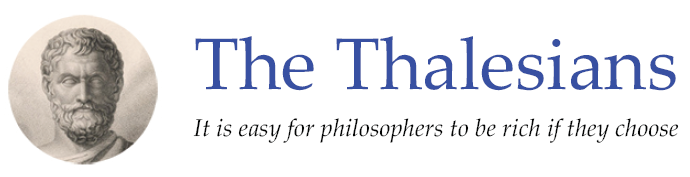

In [1]:
# Copyright (c) Thalesians Ltd, 2017-2019. All rights reserved
# Copyright (c) Paul Alexander Bilokon, 2017-2019. All rights reserved
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 1.0 (2019.04.10)
# Email: education@thalesians.com
# Platform: Tested on Windows 10 with Python 3.6

# exxeleron qPython Tester

## Motivation

**exxeleron qPython** is our library of choice for interfacing with kdb+/q from Python. In this Jupyter notebook we briefly show how to install it and test its installation.

## Objectives

* To explain how to install exxeleron qPython.
* To show how to import exxeleron qPython modules from a Jupyter notebook.
* To explain how to open a port on a kdb+/q instance.
* To show how to connect to that port from exxeleron qPython.
* To show how to send kdb+/q code to that kdb+/q instance...
* ...and work with the results in Python.
* To show how to create kdb+/q tables from exxeleron qPython...
* ...and run q-sql queries on them.

**exxeleron qPython** can be found here: https://github.com/exxeleron/qPython

To install it, use

`pip install qpython`

In particular, if you use the Anaconda Distribution, run the above from *(Your Anaconda distribution)/Scripts*.

Start a kdb+/q instance. Start listening on a port, say, 41822:

`q)\p 41822`

`q)`

Import the exxeleron qPython module:

In [2]:
from qpython import qconnection

Create the connection object:

In [3]:
q = qconnection.QConnection(host='localhost', port=41822)

Initialise the connection:

In [4]:
q.open()

Now you can evaluate q code:

In [5]:
q('3 + 5')

8

And work with the results in Python:

In [6]:
import math
math.sqrt(q('3 + 5'))

2.8284271247461903

You can also define new variables on the q instance from Python:

In [7]:
q('a: `hello')

In [8]:
q('\\v')

QList([b'a', b'quotes'],
      dtype='|S6')

...including tables:

In [9]:
q("""
quotes : ([]
code: `CLM16`GCM16`CLM16`CLM16`GCM16`CLM16`GCM16`CLM16`CLM16`CLM16`CLM16;
date: 2016.04.07 2016.04.07 2016.04.07 2016.04.07 2016.04.07 2016.04.07 2016.04.07 2016.04.08 2016.04.08 2016.04.08 2016.04.08;
time: 10:15:00.010 11:02:16.663 12:05:00.303 12:22:00.486 13:00:00.205 15:00:00.051 15:20:02.224 10:53:00.002 13:56:30.070 15:20:02.000 15:21:43.786;
bidprice: 38.34 1241.4 38.12 38.11 1238.6 38.52 1240.9 40.83 40.54 40.77 40.76;
bidsize: 86h, 22h, 7h, 16h, 8h, 9h, 6h, 6h, 38h, 26h, 3h;
askprice: 38.35 1241.5 38.13 38.12 1238.7 38.53 1241.0 40.84 40.56 40.79 40.77;
asksize: 3 1 13 8 7 18 1 66 58 44 28h;
mktflag: `E`E`E`E`E`E`E`E`E`E`E
)
""")

Then you can run q-sql queries:

In [10]:
q('select from quotes where code=`CLM16')

rec.array([(b'CLM16', 5941, 36900010,  38.34, 86,  38.35,  3, b'E'),
           (b'CLM16', 5941, 43500303,  38.12,  7,  38.13, 13, b'E'),
           (b'CLM16', 5941, 44520486,  38.11, 16,  38.12,  8, b'E'),
           (b'CLM16', 5941, 54000051,  38.52,  9,  38.53, 18, b'E'),
           (b'CLM16', 5942, 39180002,  40.83,  6,  40.84, 66, b'E'),
           (b'CLM16', 5942, 50190070,  40.54, 38,  40.56, 58, b'E'),
           (b'CLM16', 5942, 55202000,  40.77, 26,  40.79, 44, b'E'),
           (b'CLM16', 5942, 55303786,  40.76,  3,  40.77, 28, b'E')], 
          dtype=[('code', 'S5'), ('date', '<i4'), ('time', '<i4'), ('bidprice', '<f8'), ('bidsize', '<i2'), ('askprice', '<f8'), ('asksize', '<i2'), ('mktflag', 'S1')])

Notice that, in the above example, we got a `rec.array` back on the Python side. Wouldn't it be nice to be able to work with Pandas dataframes instead?

Indeed, exxeleron qPython supports this. In order to use Pandas dataframes, reopen the connection with `pandas=True`:

In [11]:
q = qconnection.QConnection(host='localhost', port=41822, pandas=True)

In [12]:
q.open()

Then something like

In [13]:
q('select from quotes where code=`CLM16')

code       date            time  bidprice  bidsize  askprice  asksize  \
0  b'CLM16' 2016-04-07 10:15:00.010000     38.34       86     38.35        3   
1  b'CLM16' 2016-04-07 12:05:00.303000     38.12        7     38.13       13   
2  b'CLM16' 2016-04-07 12:22:00.486000     38.11       16     38.12        8   
3  b'CLM16' 2016-04-07 15:00:00.051000     38.52        9     38.53       18   
4  b'CLM16' 2016-04-08 10:53:00.002000     40.83        6     40.84       66   
5  b'CLM16' 2016-04-08 13:56:30.070000     40.54       38     40.56       58   
6  b'CLM16' 2016-04-08        15:20:02     40.77       26     40.79       44   
7  b'CLM16' 2016-04-08 15:21:43.786000     40.76        3     40.77       28   

  mktflag  
0    b'E'  
1    b'E'  
2    b'E'  
3    b'E'  
4    b'E'  
5    b'E'  
6    b'E'  
7    b'E'

will return a Pandas dataframe.